<center>
  <h1>Projeto Sistemas Lineares - Gato no Labirinto</h1>
  <h2>Discente: Mickael Yoshua Cardoso Reis</h2>
  <h2>Docente: Patric Lacouth</h2>
  <h2>Matrícula: 20182610010</h2>
  
  <h3>Contextualização</h3>
</center>

<p>Um gato está perdido em um labirinto quadrado de corredores como mostra a <i>Figura 1</i>. Ao andar pelo labirinto o gato encontra interseções e escolhe aleatoriamente qual direção tomar, ao chegar nas próximas interseções faz a mesma coisa.</p>

<center>
  <figure>
    <img src="https://github.com/mickaelyoshua/Metodos_Numericos/blob/master/Sistemas%20Lineares/Captura%20de%20tela%202019-10-25%2010.25.36.png?raw=true">
    <figcaption>Figura 1 - Labirinto</figcaption>
  </figure>

  <h3>Problema</h3>
</center>

<p>O gato estando na interseção $i$, com $i$ variando de 1 a 9, qual seria a probabilidade dele sair pelo lado sul?</p>
<p>Sendo $P_1$ a probabilidade do gato que está na interseção 1 sair pelo lado sul, $P_2, P_3, ..., P_9$ definidas do mesmo modo e que ao chegar em uma saída sua jornada acabe, através da teoria das probabilidade obtemos o seguinte sistema de equações lineares para $P_i$ e saída sul:</p>

$$P_1=(0+0+P_2+P_4)/4$$
$$P_2=(0+P_1+P_3+P_5)/4$$
$$P_3=(0+P_2+0+P_6)/4$$
$$P_4=(P_1+0+P_5+P_7)/4$$
$$P_5=(P_2+P_4+P_6+P_8)/4$$
$$P_6=(P_3+P_5+0+P_9)/4$$
$$P_7=(P_4+0+P_8+1)/4$$
$$P_8=(P_5+P_7+P_9+1)/4$$
$$P_9=(P_6+P_8+0+1)/4$$

<p>Reorganizando temos:</p>

$$4P_1-P_2-P_4=0$$
$$-P_1+4P_2-P_3-P_5=0$$
$$-P_2+4P_3-P_6=0$$
$$-P_1+4P_4-P_5-P_7=0$$
$$-P_2-P_4+4P_5-P_6-P_8=0$$
$$-P_3-P_5+4P_6-P_9=0$$
$$-P_4+4P_7-P_8=1$$
$$-P_5-P_7+4P_8-P_9=1$$
$$-P_6-P_8+4P_9=1$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': lambda x: "{:.3f}".format(x)})
#Configurações de print foram colacadas para 3 casas decimais para melhor vizualização do print das matrizes.

In [ ]:
P=np.array([[4,-1,0,-1,0,0,0,0,0,0],
            [-1,4,-1,0,-1,0,0,0,0,0],
            [0,-1,4,0,0,-1,0,0,0,0],
            [-1,0,0,4,-1,0,-1,0,0,0],
            [0,-1,0,-1,4,-1,0,-1,0,0],
            [0,0,-1,0,-1,4,0,0,-1,0],
            [0,0,0,-1,0,0,4,-1,0,1],
            [0,0,0,0,-1,0,-1,4,-1,1],
            [0,0,0,0,0,-1,0,-1,4,1]], dtype=float)

print(P)

[[4.000 -1.000 0.000 -1.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [-1.000 4.000 -1.000 0.000 -1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 -1.000 4.000 0.000 0.000 -1.000 0.000 0.000 0.000 0.000]
 [-1.000 0.000 0.000 4.000 -1.000 0.000 -1.000 0.000 0.000 0.000]
 [0.000 -1.000 0.000 -1.000 4.000 -1.000 0.000 -1.000 0.000 0.000]
 [0.000 0.000 -1.000 0.000 -1.000 4.000 0.000 0.000 -1.000 0.000]
 [0.000 0.000 0.000 -1.000 0.000 0.000 4.000 -1.000 0.000 1.000]
 [0.000 0.000 0.000 0.000 -1.000 0.000 -1.000 4.000 -1.000 1.000]
 [0.000 0.000 0.000 0.000 0.000 -1.000 0.000 -1.000 4.000 1.000]]


<center>
  <h2>Resolução</h2>
  <h3>Método de Gauss Ingênuo</h3>
</center>
<p>O método de Gauss Ingênuo se encaixa perfeitamente neste caso, pois nenhum de seus pivôs são nulos, evitando uma divisão por 0. Isso demonstra não ser necessária a utilização de pivotação parcial.</p>

In [ ]:
def trian_sup(M):                        #Foi feita uma função a parte para deixar a matriz na forma de triângulo superior
  for j in range(M.shape[0]-1):
    for i in range(M.shape[0]-1):
      if i==j:
        pivo=M[i,j]                      #Definição do pivô
      mul=M[i+1,j]/pivo                  #Cálculo do multiplicador
      M[i+1,:]=M[i+1,:]-M[j,:]*mul       #Subtração e substituição das linhas zerando a coluna abaixo do pivô
  return M

def gauss_ingenuo(A):
  M=A.copy()                             #Tirada a cópia da matriz
  x=np.zeros(M.shape[0])                 #Matriz das raizes nulas
  M=trian_sup(M)                         #Retorna uma triângulo superior
  for j in range(M.shape[0]-1, -1, -1):  #Obtenção das raízes através da fórmula apresentada no método de Gauss Seidel
    independente=M[j,-1]
    soma=0.0
    for i in range(M.shape[0]):
      if j!=i:
        soma+=M[j,i]*x[i]
    x[j]=(independente-soma)/M[j,j]
    
  return x

In [ ]:
print(gauss_ingenuo(P))                 #Raizes de Pi em ordem crescente de i entre 1 e 9

[0.071 0.098 0.071 0.188 0.250 0.188 0.429 0.527 0.429]


<center>
  <h3>Método de Gauss com Pivotação Parcial</h3>
</center>
<p>Não se faz necessário o uso do método de Gauss com Pivotação Parcial, pois não há nenhum risco de divisão por 0 neste sistema de equações utilizando este método. Porém seu resultado continua correto.</p>

In [ ]:
def gauss_piv(A):
  M=A.copy()
  x=np.zeros(M.shape[0])
  
  for j in range(M.shape[0]-1):         #Loop para pivotação parcial
    indice=np.argmax(M[j:,j])+j
    M[[indice,j]]=M[[j,indice]]
    
    for i in range(M.shape[0]-1):       #Gera a matriz triangular superior
      if i==j:
        pivo=M[i,j]
      mul=M[i+1,j]/pivo
      M[i+1,:]=M[i+1,:]-M[j,:]*mul
      
  for j in range(M.shape[0]-1, -1, -1): #Obtém as raízes
    x[j]=M[j,-1]/M[j,j]
    for i in range(j):
      M[i,-1]=M[i,-1]-x[j]*M[i,j]
      M[i,j]=0.0
  return x

In [ ]:
print(gauss_piv(P))             #Raizes de Pi em ordem crescente de i entre 1 e 9

[0.071 0.098 0.071 0.187 0.250 0.188 0.429 0.527 0.429]


<center>
  <h3>Método de Gauss Seidel</h3>
</center>
<p>Pelo método de Gauss Seidel ser um método iterativo corre o risco de não convergir caso o elemento da diagonal principal em módulo seja igual ou menor que a soma dos módulos dos outros elementos de sua linha.</p>
<p>Mesmo se a condição citada a cima for verdadeira ainda existe a chance do sistema convergir.</p>
<p>Continua sendo favorável usar o método de Gauss Ingênuo, por ser um método direto com convergência garantida caso o sistema linear possua solução.</p>

In [ ]:
def gauss_seidel(A, it_max, tol):
  M=A.copy()
  erro=np.zeros(M.shape[0])        #Matriz de erros
  x=np.zeros(M.shape[0])           #Matriz das raizes atuais
  x_ant=np.zeros(M.shape[0])       #Matriz das raizes anteriores
  test=0                           #Variáveis test e count para testar convergência do sistema
  count=0
  
  for l in range(M.shape[0]):      #Teste da convergência
    for c in range(M.shape[0]-1):
      if l!=c:
        test+=abs(M[l,c])
    if abs(M[l,l])<=test:
      count+=1
      
  if count>0:
    print("Sistema linear pode não convergir.")

  for it in range(it_max):        #Defini o limite de iterações pela quantidade especificada
    for i in range(M.shape[0]):   #Obtenção das raízes
      independente=M[i,-1]
      soma=0.0

      for j in range(M.shape[0]):
        if j!=i:
          soma+=M[i,j]*x[j]
      x[i]=(independente-soma)/M[i,i]

    erro[i]=abs((x[i]-x_ant[i])/x[i])*100  #Cálculo do erro
    x_ant=x.copy()

    if erro.max()<=tol:                    #Verificação do erro de maior valor
      break                                #Causa a parada quando o valor máximo do erro entre as 3 raízes chega ao limite de tolerância

  return x, erro

In [ ]:
x, erro = gauss_seidel(P,200,0.0005)      #Raizes de Pi em ordem crescente de i entre 1 e 9
print(x)

Sistema linear pode não convergir.
[0.071 0.098 0.071 0.187 0.250 0.187 0.429 0.527 0.429]


<p>Se for obsevada a linha 5 da matriz P nota-se que a condição de convergência não se aplica a ela:</p>

In [ ]:
print(P[4,:])

[0.000 -1.000 0.000 -1.000 4.000 -1.000 0.000 -1.000 0.000 0.000]


<p>No entanto os valores obtidos neste método convergiram, provando que mesmo o teste dando negativo ainda existe a chance de convergir, o jeito mais seguro de ter certeza seria comparando o resultado com outro método.</p>

<center>
  <h3>Método da Decomposição LU</h3>
</center>
<p>Este método é dividido em 2 grandes partes, a decomposição da matriz dos coeficientes dependentes chamada a seguir de A em duas outras chamdas L e U e a obtenção das raízes do sistema linear.</p>
<p>Esse método não é muito recomendado pois exige um trabalho extra para obtenção das raizes. Caso mudássemos o lado que o gato saia para uma das outras 3 (Norte, Leste ou Oeste) não só os termos indepenentes mudariam como todo o sistema também mudaria exigindo que a decomposição seja feita novamente, sendo assim um trabalho desnecessário se comparado com outros métodos.</p>

In [ ]:
A=np.array([[4,-1,0,-1,0,0,0,0,0],
            [-1,4,-1,0,-1,0,0,0,0],
            [0,-1,4,0,0,-1,0,0,0],
            [-1,0,0,4,-1,0,-1,0,0],
            [0,-1,0,-1,4,-1,0,-1,0],
            [0,0,-1,0,-1,4,0,0,-1],
            [0,0,0,-1,0,0,4,-1,0],
            [0,0,0,0,-1,0,-1,4,-1],
            [0,0,0,0,0,-1,0,-1,4]], dtype=float)                  #Matriz dos coeficientes

B=np.array([[0],[0],[0],[0],[0],[0],[1],[1],[1]], dtype=float)    #Matriz dos termos independentes

print(A)
print(B)

[[4.000 -1.000 0.000 -1.000 0.000 0.000 0.000 0.000 0.000]
 [-1.000 4.000 -1.000 0.000 -1.000 0.000 0.000 0.000 0.000]
 [0.000 -1.000 4.000 0.000 0.000 -1.000 0.000 0.000 0.000]
 [-1.000 0.000 0.000 4.000 -1.000 0.000 -1.000 0.000 0.000]
 [0.000 -1.000 0.000 -1.000 4.000 -1.000 0.000 -1.000 0.000]
 [0.000 0.000 -1.000 0.000 -1.000 4.000 0.000 0.000 -1.000]
 [0.000 0.000 0.000 -1.000 0.000 0.000 4.000 -1.000 0.000]
 [0.000 0.000 0.000 0.000 -1.000 0.000 -1.000 4.000 -1.000]
 [0.000 0.000 0.000 0.000 0.000 -1.000 0.000 -1.000 4.000]]
[[0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]]


In [ ]:
def calcular_LU(M):
  U=M.copy()
  L=np.identity(U.shape[0])
  
  for j in range(U.shape[0]-1):
    for i in range(j+1,U.shape[0]):
        mul=U[i,j]/U[j,j]
        U[i,:]=U[i,:]-U[j,:]*mul     #Transformação em triangular superior
        L[i,j]=mul                   #Transformação em triangular inferior colocando os múltiplos na matriz
        
  return L, U

L, U = calcular_LU(A)

print(L.dot(U))                       #Ao multiplicar as matrizes L e U obtemos a matriz A original indicando que a decomposição está correta

[[4.000 -1.000 0.000 -1.000 0.000 0.000 0.000 0.000 0.000]
 [-1.000 4.000 -1.000 0.000 -1.000 0.000 0.000 0.000 0.000]
 [0.000 -1.000 4.000 0.000 0.000 -1.000 0.000 0.000 0.000]
 [-1.000 0.000 0.000 4.000 -1.000 0.000 -1.000 0.000 0.000]
 [0.000 -1.000 0.000 -1.000 4.000 -1.000 0.000 -1.000 0.000]
 [0.000 0.000 -1.000 -0.000 -1.000 4.000 0.000 0.000 -1.000]
 [0.000 0.000 0.000 -1.000 0.000 -0.000 4.000 -1.000 0.000]
 [0.000 0.000 0.000 0.000 -1.000 -0.000 -1.000 4.000 -1.000]
 [0.000 0.000 0.000 0.000 0.000 -1.000 0.000 -1.000 4.000]]


In [ ]:
def calcular_Z(L,B):                        #Cálculo da matriz z dos resultados transitórios
  Z=np.zeros(L.shape[0])

  for i in range(L.shape[0]):
    Z[i]=B[i]
    
    for j in range(i):
      Z[i]=Z[i]-L[i,j]*Z[j]
      
  return Z

def calcular_X(U,Z):                       #Cálculo das raizes do sitema linear
  X=np.zeros(U.shape[0])

  for i in range(U.shape[0]-1, -1, -1):
    X[i]=Z[i]
    
    for j in range(i+1, U.shape[0]):
      X[i]=X[i]-U[i,j]*X[j]
    X[i]=X[i]/U[i,i]
    
  return X

In [ ]:
Z=calcular_Z(L,B)
X=calcular_X(U,Z)
print(X)                                 #Raizes de Pi em ordem crescente de i entre 1 e 9

[0.071 0.098 0.071 0.188 0.250 0.188 0.429 0.527 0.429]


<center>
  <h2>Análise dos Resutados</h2>
</center>
<p>Primeiro coloquemos os resultados em um gráfico de barras para melhor visualização dos resultados e traremos a <i>Figura 1</i> novamente.</p>

<center>
  <figure>
    <img src="https://github.com/mickaelyoshua/Metodos_Numericos/blob/master/Sistemas%20Lineares/Captura%20de%20tela%202019-10-25%2010.25.36.png?raw=true">
    <figcaption>Figura 1 - Labirinto</figcaption>
  </figure>
</center>


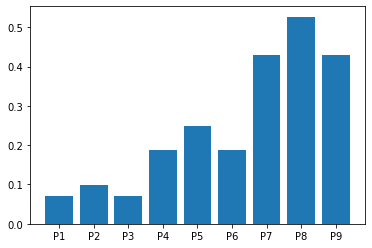

In [ ]:
a=np.arange(9)
plt.bar(a,X)
plt.xticks(a, ('P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'))
plt.show()

<p>A análise será feita das interseções que possuem menos chance do gato sair pelo lado sul até as que possuem mais chances e será feita de 3 em 3.</p>

<h3>Interseções 1, 2 e 3:</h3>
<p>São as 3 interseções com menor probabilidade do gato sair pelo lado sul do labirindo por serem as mais distantes, as 1 e 3 pussuem mesma probabilidade, pois estão em mesmas condições onde existem duas saídas para o lado errado e outras duas para outras interseções dando novas possibilidades. Diferente das 1 e 3, a 2 possui apenas uma saída para o lado errado lhe dando aumento de probabilidade.</p>

<h3>Interseções 4, 5, e 6:</h3>
<p>Possuem mais probabilidade do que as anteriores por estarem mais próximas do lado sul. As 4 e 6 possuem mesmas probabiliades por também estarem nas mesmas condições onde possuem uma saída para o lado errado, enquanto a de número 5 não possue nenhuma saída para o lado errado ou certo lhe dando um aumento de probabilidade.</p>

<h3>Interseções 7, 8, e 9:</h3>
<p>São as com maiores chances do gato sair pelo lado sul do labirinto por estarem mais próximas do mesmo lado. As chanches das 7 e 9 são iguais, pois possuem uma saída para o lado errado porém uma para o lado certo, mesmo a de número 8 possuindo também apenas uma saída para o lado desejado, suas outras levam para outras interseções dando um aumento de suas chances tornando-se a interseção com maior probabilidade.</p>

<center>
  <h2>Conclusão</h2>
</center>
<p>Ao ser feita a observação dos resultados e as devidas análises conclui-se que quanto mais perto do centro do labirinto e quanto mais próximo do lado desejado, no nosso caso o sul, o gato estiver, maiores serão suas chances.</p>

<center>
  <h2>Referências</h2>
</center>
<p>FRANCO, Neide Maria Bertoldi. Cálculo Numérico. Universidade de São Paulo
Instituto de Ciências Matemáticas e de Computação.</p>